In [5]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
#!pip install tensorflow

### Importing the required libraries

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
#resizing the imag to 224 as resnet50 needs this image size
IMAGE_SIZE = [224,224]
train_path='Data/Train'
valid_path='Data/Validation'

In [5]:
#importing the resnet50 library
#weights that i have used are imagenet weights
#include_top = false , because i dont  want the  bottom layer , this  layer will be mine
resnet=ResNet50(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False )

94773248/94765736 [==============================] - 24s 0us/step


In [6]:
#dont train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [8]:
#getting number no. of output classes 
folders=glob('Data/Train/*')  

In [9]:
len(folders)

2

In [10]:
#for output layer
x=Flatten()(resnet.output) 

In [18]:
#softmax for multi class output
prediction=Dense(2,activation='softmax')(x)
# 
model=Model(inputs=resnet.input,outputs=prediction) 

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [20]:
#compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
#image data generator to  import images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#with data augmetation 
#we shold not do zoom and horizontal flip for test data

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 86 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory('Data/Validation', 
                                            target_size = (224, 224), 
                                            batch_size = 32, 
                                            class_mode = 'categorical') 

Found 55 images belonging to 2 classes.


In [24]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
3/3 [==============================] - 33s 11s/step - loss: 4.6129 - accuracy: 0.5814 - val_loss: 2.6495 - val_accuracy: 0.6182
Epoch 2/20
3/3 [==============================] - 25s 9s/step - loss: 5.1877 - accuracy: 0.3721 - val_loss: 2.1670 - val_accuracy: 0.3818
Epoch 3/20
3/3 [==============================] - 25s 9s/step - loss: 2.5480 - accuracy: 0.5116 - val_loss: 4.4134 - val_accuracy: 0.6182
Epoch 4/20
3/3 [==============================] - 28s 10s/step - loss: 3.5650 - accuracy: 0.6279 - val_loss: 0.4534 - val_accuracy: 0.7818
Epoch 5/20
3/3 [==============================] - 25s 9s/step - loss: 1.4269 - accuracy: 0.5930 - val_loss: 1.3208 - val_accuracy: 0.3818
Epoch 6/20
3/3 [==============================] - 25s 10s/step - loss: 0.8587 - accuracy: 0.6395 - val_loss: 1.5547 - val_accuracy: 0.6182
Epoch 7/20
3/3 [==============================] - 25s 9s/step - loss: 1.0122 - accuracy: 0.7209 - val_loss: 1.1779 - val_accuracy: 0.4545
Epoch 8/20
3/3 [===============

In [25]:
import matplotlib.pyplot as plt 

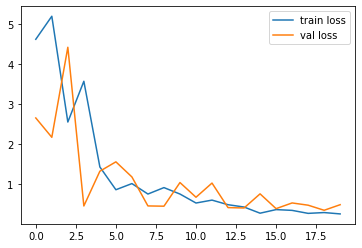

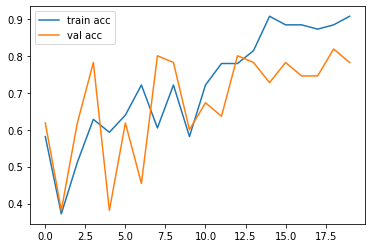

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss 
plt.plot(r.history['loss'], label='train loss') 
plt.plot(r.history['val_loss'], label='val loss') 
plt.legend() 
plt.show() 
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file

model.save('face_recognition_resnet50.h5')

C:\Users\Swati Panchal\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [2]:
from tensorflow.keras.models import load_model

In [3]:
model = load_model('face_recognition_resnet50.h5')

In [12]:
(eval_loss, eval_accuracy) = model.evaluate(test_set,batch_size=32,verbose=1) 

2/2 [==============================] - 10s 3s/step - loss: 0.4851 - accuracy: 0.7818


In [29]:
y_pred = model.predict(test_set) 

In [30]:
y_pred

array([[0.88085836, 0.11914161],
       [0.87111634, 0.12888372],
       [0.84073895, 0.15926106],
       [0.8021022 , 0.19789775],
       [0.00216657, 0.99783343],
       [0.36677617, 0.6332238 ],
       [0.29936042, 0.7006396 ],
       [0.6013324 , 0.39866754],
       [0.00673788, 0.9932621 ],
       [0.95927715, 0.04072287],
       [0.5266747 , 0.4733253 ],
       [0.12748201, 0.872518  ],
       [0.39775252, 0.6022474 ],
       [0.919159  , 0.08084097],
       [0.0390458 , 0.9609541 ],
       [0.73112744, 0.26887256],
       [0.85157937, 0.14842059],
       [0.31245163, 0.6875484 ],
       [0.89386046, 0.10613952],
       [0.3616082 , 0.63839185],
       [0.8550492 , 0.1449508 ],
       [0.02388631, 0.97611374],
       [0.8193046 , 0.18069541],
       [0.02995755, 0.97004247],
       [0.94745934, 0.05254064],
       [0.01108714, 0.9889129 ],
       [0.04714024, 0.9528598 ],
       [0.2607121 , 0.7392879 ],
       [0.10726012, 0.8927399 ],
       [0.8298147 , 0.1701853 ],
       [0.

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [13]:
from keras.preprocessing.image import img_to_array , load_img 

In [14]:
import numpy as np 

In [15]:
import time

[INFO] loading and preprocessing image…
Final Decision:
Unknown


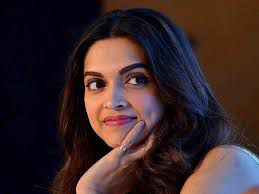

In [31]:
# predioct the images 
def read_image(file_path):
    print('[INFO] loading and preprocessing image…') 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image

def test_single_image(path):
    images = read_image(path)
    time.sleep(.5)
    
    print('Final Decision:')
    time.sleep(.5)

    preds = model.predict(images)
    preds=np.argmax(preds, axis=1)
     
    if preds==0:
        preds="Swati"
    else:
        preds="Unknown"
    print(preds)
    return load_img(path)


path = 'C:/Users/Swati Panchal/Downloads/img6.jpg' 
test_single_image(path)  